In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score

In [2]:
df = pd.read_csv("../dataset/customer_churn_records.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
# Set the style of all visualizations
sns.set(style="whitegrid")

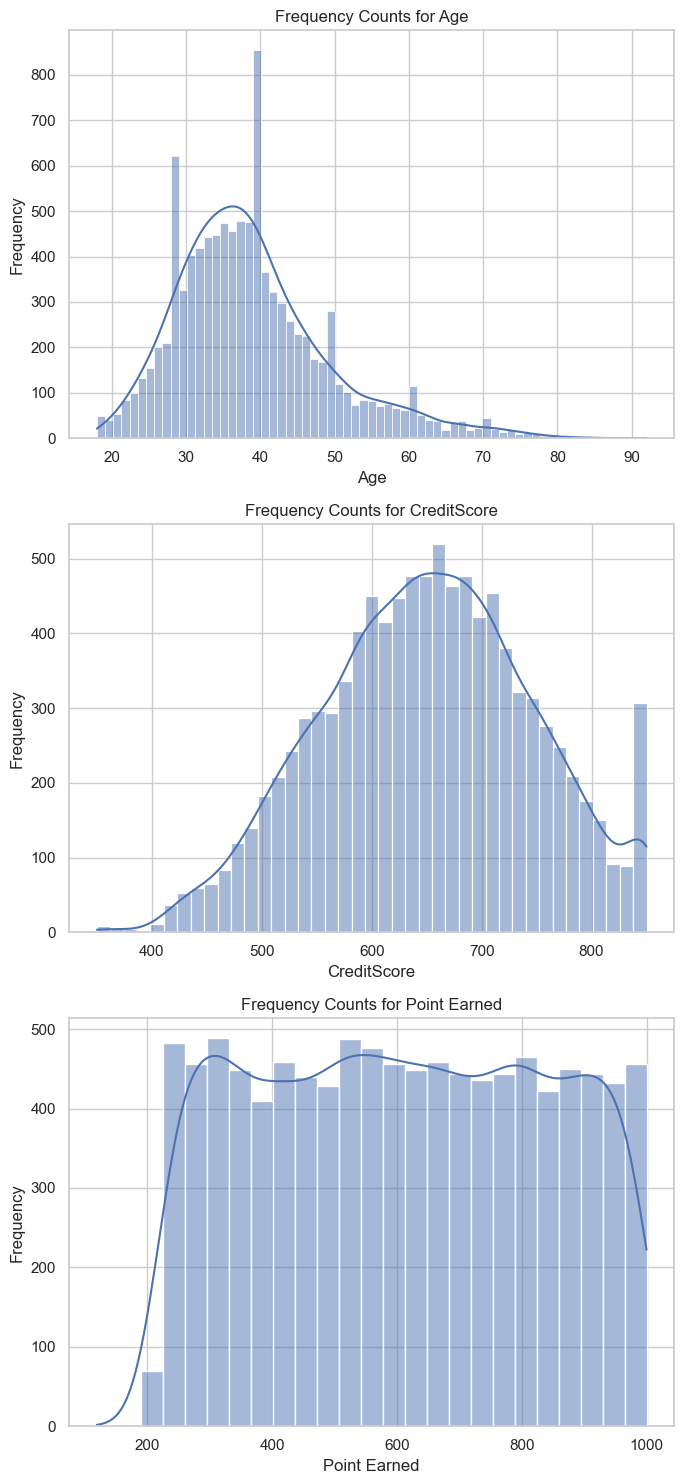

In [18]:
def visualize_numerical_frequency_counts(df):
    # Select only specified numerical columns
    numerical_columns = ["Age", "CreditScore", "Point Earned"]
    
    # Number of plots
    num_plots = len(numerical_columns)
    
    # Create a figure with subplots
    fig, axes = plt.subplots(num_plots, 1, figsize=(7, num_plots * 5))
    
    if num_plots == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_columns):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Frequency Counts for {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
visualize_numerical_frequency_counts(df)


*NOTE: For all categorical variables, e.g. exited, HasCrCard, isActiveMember..., 0 stands for NO while 1 stands for YES.*

*Illustration, if a customer's exit record shows 0, that means he/she didn't exit the bank and vice versa.*

**Visualization of Some Categorical Variables**

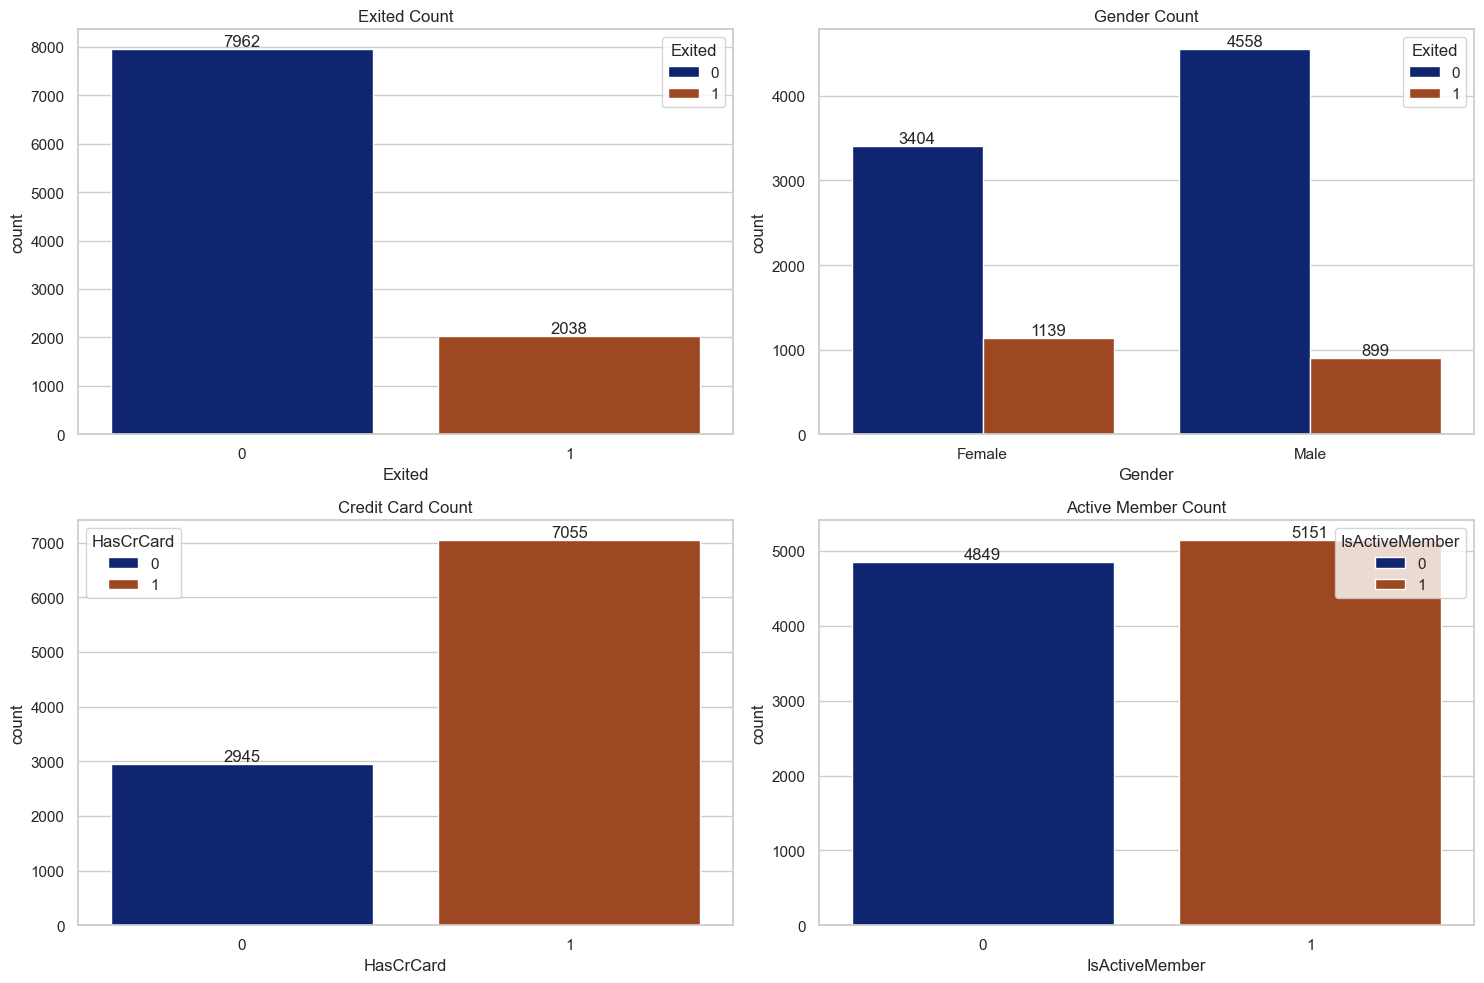

In [9]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot Exited Count
ax = sns.countplot(data=df, x='Exited', hue='Exited', palette='dark', ax=axes[0,0])
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,0].set_title('Exited Count')

# Plot Gender Count
ax = sns.countplot(data=df, x='Gender', hue='Exited', palette='dark', ax=axes[0,1])
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,1].set_title('Gender Count')

# Plot Credit Card Count
ax = sns.countplot(data=df, x='HasCrCard', hue='HasCrCard', palette='dark', ax=axes[1,0])
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,0].set_title('Credit Card Count')

# Plot Active Member Count
ax = sns.countplot(data=df, x='IsActiveMember', hue='IsActiveMember', palette='dark', ax=axes[1,1])
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,1].set_title('Active Member Count')

# Adjust layout
plt.tight_layout()
plt.show()


**Visualizations to compare the rate of exit of customers**

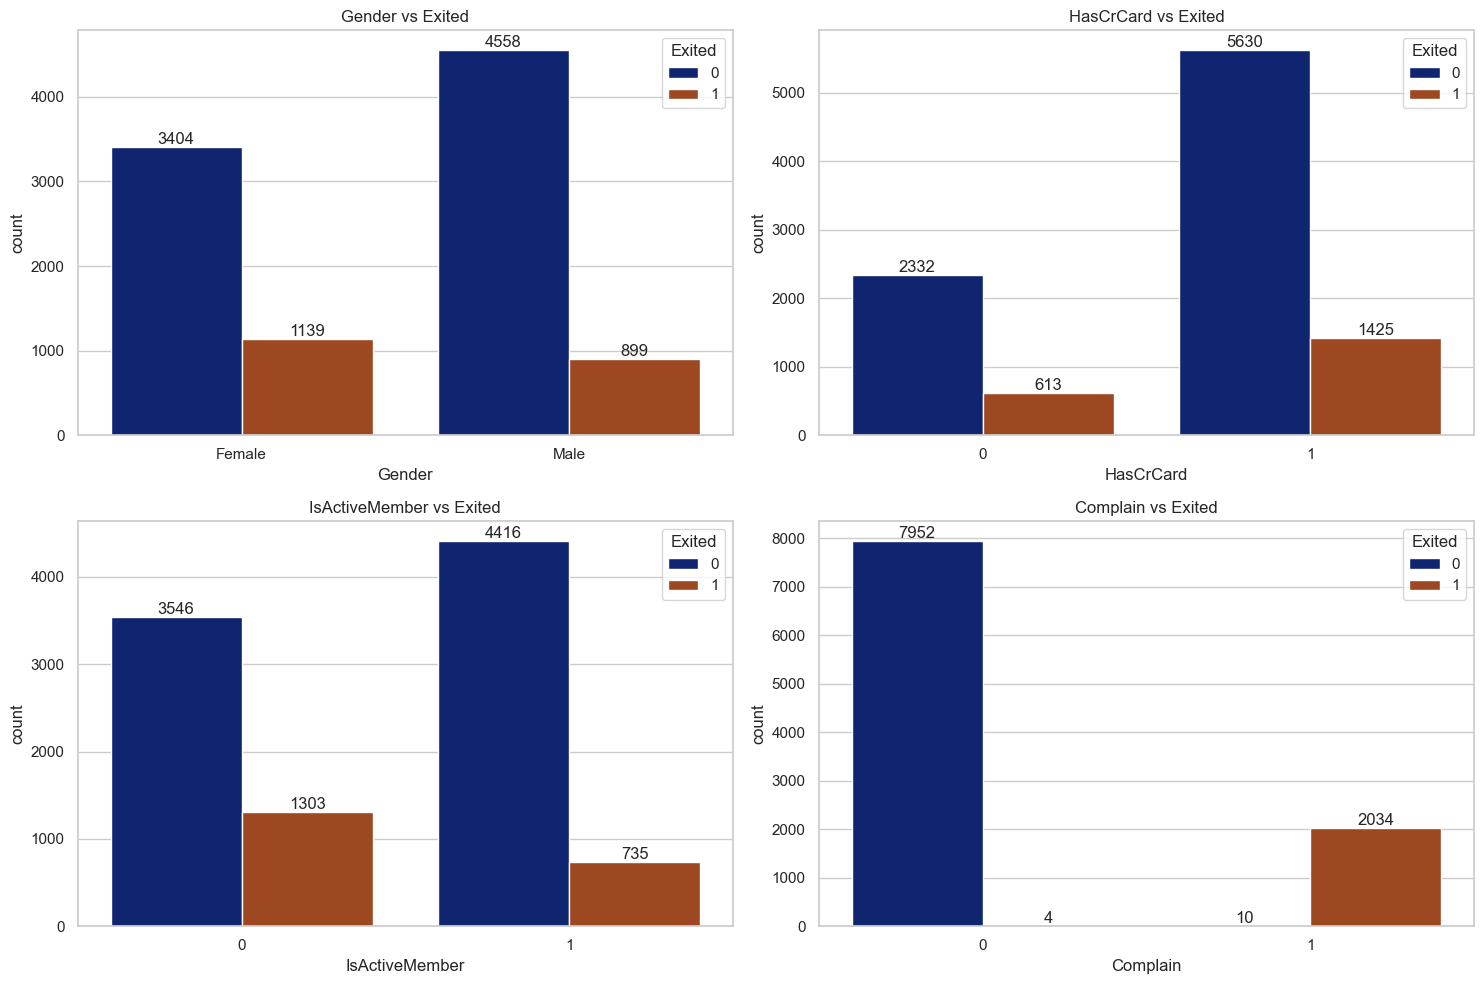

In [10]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax = sns.countplot(data=df, x='Gender', ax=axes[0,0], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,0].set_title('Gender vs Exited')

ax = sns.countplot(data=df, x='HasCrCard', ax=axes[0,1], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,1].set_title('HasCrCard vs Exited')

ax = sns.countplot(data=df, x='IsActiveMember', ax=axes[1,0], hue='Exited', palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,0].set_title('IsActiveMember vs Exited')

ax = sns.countplot(data=df,x='Complain',ax=axes[1,1], hue='Exited',palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,1].set_title('Complain vs Exited')


plt.tight_layout()
plt.show()

In [11]:
df["Exited"].value_counts(normalize=True)*100

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

From the graphs above, it's evident that:
- People who are active members are less likely to exit the bank as well as those with credit cards.
- More females left the bank compared to thier male counterparts.
- lots of customers lodged complaints and most of them eventually left the bank.
- 20% left while 79.6% are still active customers.

Correlation Matrix:
                        Exited    Complain  EstimatedSalary         Age  \
Exited              100.000000   99.569250         1.248972   28.529646   
Complain             99.569250  100.000000         1.249395   28.352989   
EstimatedSalary       1.248972    1.249395       100.000000   -0.720104   
Age                  28.529646   28.352989        -0.720104  100.000000   
CreditScore          -2.677145   -2.704797        -0.138429   -0.396491   
Balance              11.857690   11.912426         1.279750    2.830837   
HasCrCard            -0.697607   -0.709521        -0.993341   -1.172103   
Satisfaction Score   -0.584920   -0.479908        -1.374663   -0.087637   

                    CreditScore     Balance   HasCrCard  Satisfaction Score  
Exited                -2.677145   11.857690   -0.697607           -0.584920  
Complain              -2.704797   11.912426   -0.709521           -0.479908  
EstimatedSalary       -0.138429    1.279750   -0.993341           -1.3

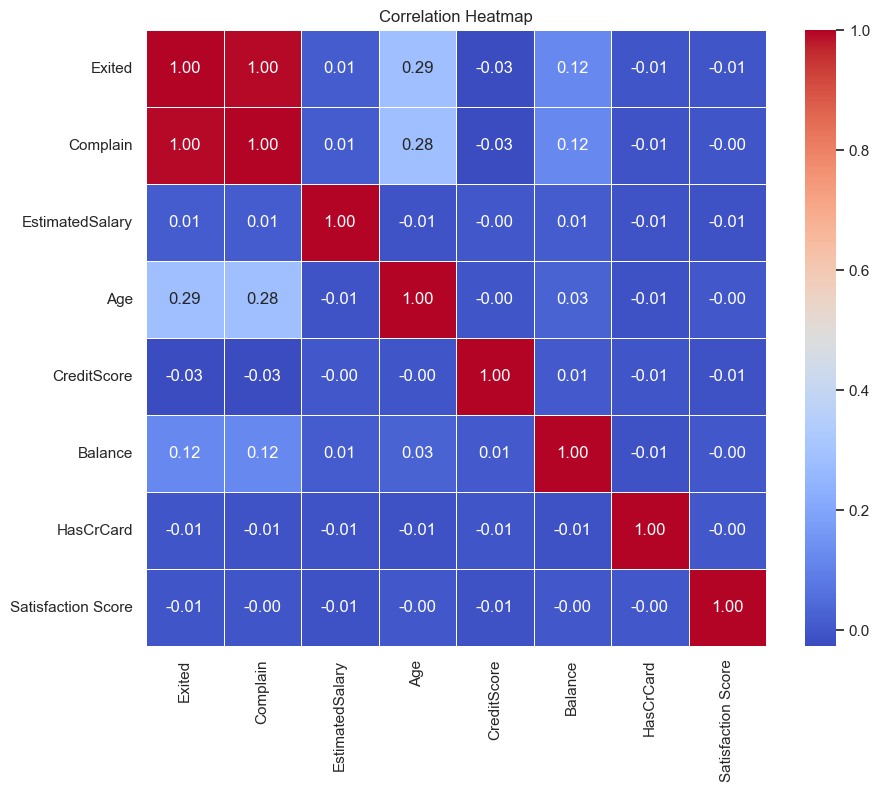

In [12]:
numerical_columns = ["Exited", "Complain", "EstimatedSalary", "Age", "CreditScore", "Balance", "HasCrCard", "Satisfaction Score"]

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix * 100)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure for the heatmap
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")

# Set title and labels
plt.title('Correlation Heatmap')
plt.show()


From the heatmap above, we can see that rate of exit of customers and complaints are heavily correlated, with a relation of 99.5%.
Age also has a role to play in rate of exit as the correlation between both is appoximately 29%.
This implies that younger people are more likely to leave the bank.


...

Preprocessing the data


In [13]:

# Identifying and Removing Outliers
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "Point Earned"]

# Calculate Z-scores
z_scores = stats.zscore(df[numerical_columns])

# Create a DataFrame of Z-scores
z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

# Filter out rows with Z-scores greater than 3 or less than -3
df_no_outliers = df[(z_scores_df < 3).all(axis=1)]

print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

categorical_columns = categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns)

scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])


Original dataset shape: (10000, 18)
Dataset shape after removing outliers: (9807, 18)


**Building the model**

In [19]:
target = 'Exited' 

# Features and target split
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Initialize the Logistic Regression model with class weight adjustment
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Training and validation accuracy
def pred_acc(y, y_hat):
    return precision_score(y, y_hat, zero_division=1) * 100

train_pred = model.predict(X_train)
val_pred = model.predict(X_test)
    
print('Training Accuracy = {:.4f} %'.format(pred_acc(y_train, train_pred)))
print('Validation Accuracy = {:.4f} %'.format(pred_acc(y_test, val_pred)))



Training set size: 7845
Testing set size: 1962
Confusion Matrix:
[[1562    1]
 [   1  398]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1563
           1       1.00      1.00      1.00       399

    accuracy                           1.00      1962
   macro avg       1.00      1.00      1.00      1962
weighted avg       1.00      1.00      1.00      1962


Accuracy Score:
0.9989806320081549
Training Accuracy = 99.4282 %
Validation Accuracy = 99.7494 %


Hmmm

This looks too perfect.

The model might be overfitting the model
Let's conduct some more tests

Cross-validation scores: [0.84505607 0.85881753 0.99949006 0.99694034 0.85619582]
Mean cross-validation score: 0.9112999618971577
ROC-AUC score: 0.9996776971218835


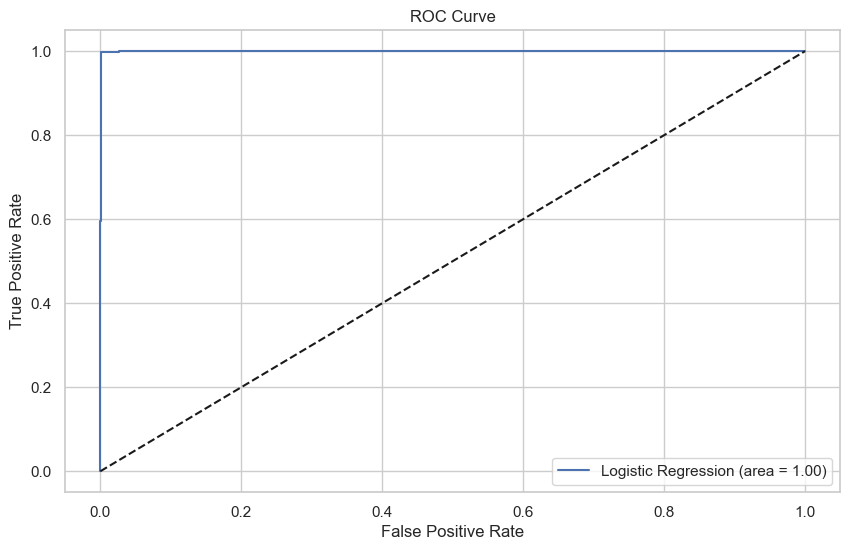

In [17]:
from sklearn.model_selection import cross_val_score

# Initialize the Logistic Regression model with class weight adjustment
model = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")

# Evaluate using ROC-AUC score
from sklearn.metrics import roc_auc_score, roc_curve

# Train the model
model.fit(X_train, y_train)

# Make probability predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC score: {roc_auc}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
